In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Case_Study
We have a cab trip dataset wherein details regarding customer_request_id, pick up point, driver id, status, request timestamp and drop timestamp are captured.
Agenda is to perform EDA and identify hidden patterns, if any.

#### Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Facts and Figures about our dataset(Understanding the data)

#### Read the csv into a dataframe(df) and print the first 5 rows

In [3]:
df = pd.read_csv("/content/drive/MyDrive/EDA/Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
len(df["Request id"].unique())

6745

#### Show the number of rows and columns in the dataset

In [5]:
df.shape

(6745, 6)

#### Show the number of NaNs in each columns

In [6]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

#### Show the % of NaNs in each columns

In [7]:
df.isnull().sum()/df.shape[0]*100 # df.shape[0] gives the number of rows

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

#### Show the details such as column names,dtypes,non-null count for the given data

#### Extracted Info:
##### Number of Rows: 6745
##### Number of Columns: 6
##### Dtype of each column based on the type of data it holds
##### There are 2 numerical(int and float) anf 4 objects columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Finding out the statistical summary for both numerical and object columns in one place

In [9]:
df.describe(include="all")

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 19:02,11/7/2016 13:00
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


### 2. Cleaning/Handling the data

#### We see that for the column "Request timstamp", the format of DateTime is different for different sections of data. Some have it separated by "-" and some have it separated by "/".
#### Let us first replace the "/" with "-" to have uniformity and then convert the enite column to standard datatime format using "pd.to_datatime" function.

In [10]:
df["Request timestamp"].value_counts()

11/7/2016 19:02        6
11/7/2016 17:57        6
11/7/2016 8:37         6
11/7/2016 9:40         6
12/7/2016 21:42        5
                      ..
15-07-2016 18:08:33    1
15-07-2016 04:50:54    1
14-07-2016 18:42:23    1
13-07-2016 19:26:50    1
15-07-2016 23:55:03    1
Name: Request timestamp, Length: 5618, dtype: int64

In [11]:
df["Request timestamp"] = df["Request timestamp"].astype(str)

In [12]:
df["Request timestamp"] = df["Request timestamp"].replace("/","-")

In [13]:
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"],dayfirst=True)

#### After doing the datatime conversion, if we pull the info again, we see that "Request timestamp" is converted to "datetime".

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


#### Similarly convert "Drop timestamp" column from "object" to "datatime"

In [15]:
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"],dayfirst=True)

#### Pulling up the info, now we can see both "Request timestamp" and "Drop timestamp" are converted to datatime standard.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [17]:
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

#### We now add 2 columns "req_hour"(which is hour of the request during the day) and "req_day"(which is the day of the month) to determine and catogorise the load of cab service requests.

In [18]:
# Fetching the hour number from the request timestamp
req_hour = df["Request timestamp"].dt.hour
req_hour.head()

0    11
1    17
2     9
3    21
4     8
Name: Request timestamp, dtype: int64

In [19]:
# Adding a new column "req_hour" from the hour number fetched from above
df["req_hour"] = req_hour

In [20]:
# Fetching the day number from the request timestamp
req_day = df["Request timestamp"].dt.day
req_day.head()

0    11
1    11
2    12
3    12
4    13
Name: Request timestamp, dtype: int64

In [21]:
# Adding a new column "req_day" from the day number fetched from above
df["req_day"] = req_day

### Note:
#### The NaNs/missing values in the column "Driver_Id" can be ignored.
#### This is because we see that since there were NO CARS AVAILABLE at point of the day after the user tried to book a cab, no driver was alloted the trip and hence the driver_id is empty.
#### Similary, we can ignore the NaNs/missing values in the column "Drop timestamp" as for all of them, the trip is either CANCELLED or NO CARS AVAILABLE.
#### In both the above cases, the data is missing due to a genuine reason and not that it got lost during data collection. Hence, they are not imputed with any other values based on any logic.

### 3. Explore, Visualize and Analyse

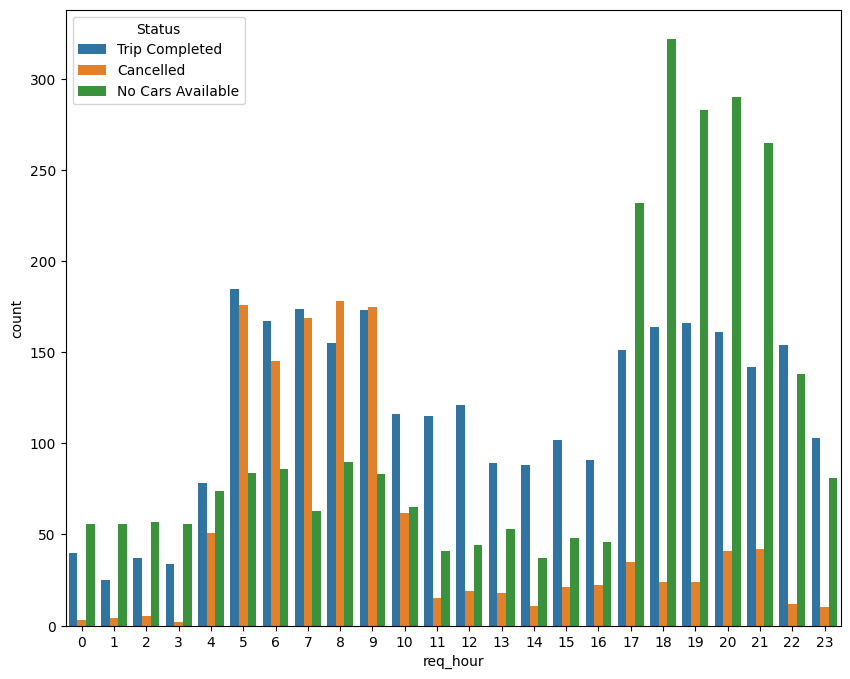

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x="req_hour", data=df, hue="Status")
plt.show()

<Figure size 1000x800 with 0 Axes>

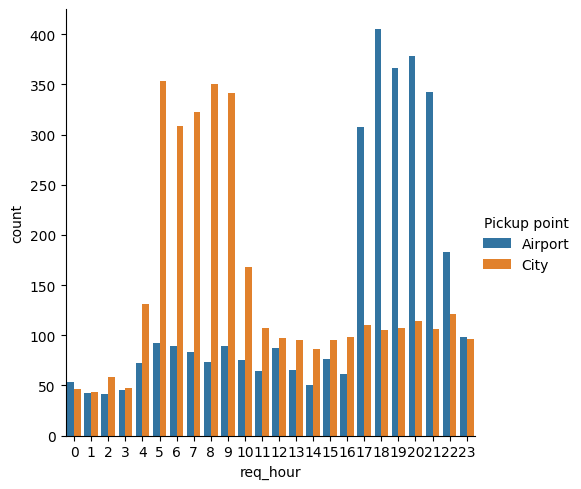

In [23]:
plt.figure(figsize=(10,8))
sns.catplot(x="req_hour",  data=df, hue="Pickup point", kind="count")
plt.show()

#### Plot of Status of the trip at different hours of the day and also pick up locations shows that,
#### 1) Between hours 5AM-9AM, the load on cabs are high with almost equal amount of trips getting completed and cancelled.
#### 2) Between hours 5PM-9PM, the load on cabs are significantly high. Hence, there is mismatch between cab demand and availabilty. Hence, we see more of "No cars Available Status".
#### 3) Between hours 5AM-9AM, the users from city is significantly high.
#### 4) Between hours 5PM-9PM, the users from Airport is significantly high.

#### Adding a new column Time_Slot to make categories of hours from the req_hour column

In [24]:
df["Time_Slot"] = 0

In [25]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0


### Hour Categories:
    
#### req_hour<5 as "Pre_Morning"
#### req_hour<10 as "Morning_Rush"
#### req_hour<17 as "Day_Time"
#### req_hour<22 as "Evening_Rush"
#### else "Late_Night"

In [26]:
j = 0
for i in df["req_hour"]:
    if df.iloc[j,6] < 5:
        df.iloc[j,8] = "Pre_Morning"
    elif 5 <= df.iloc[j,6] < 10:
        df.iloc[j,8] = "Morning_Rush"

    elif 10 <= df.iloc[j,6] < 17:
        df.iloc[j,8] = "Day_Time"

    elif 17 <= df.iloc[j,6] < 22:
        df.iloc[j,8] = "Evening_Rush"
    else:
        df.iloc[j,8] = "Late_Night"
    j = j+1

In [27]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush


In [28]:
df["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_Slot, dtype: int64

#### You see from the above value counts, the "Morning_Rush" and "Evening_Rush" are the hours with maximum load.

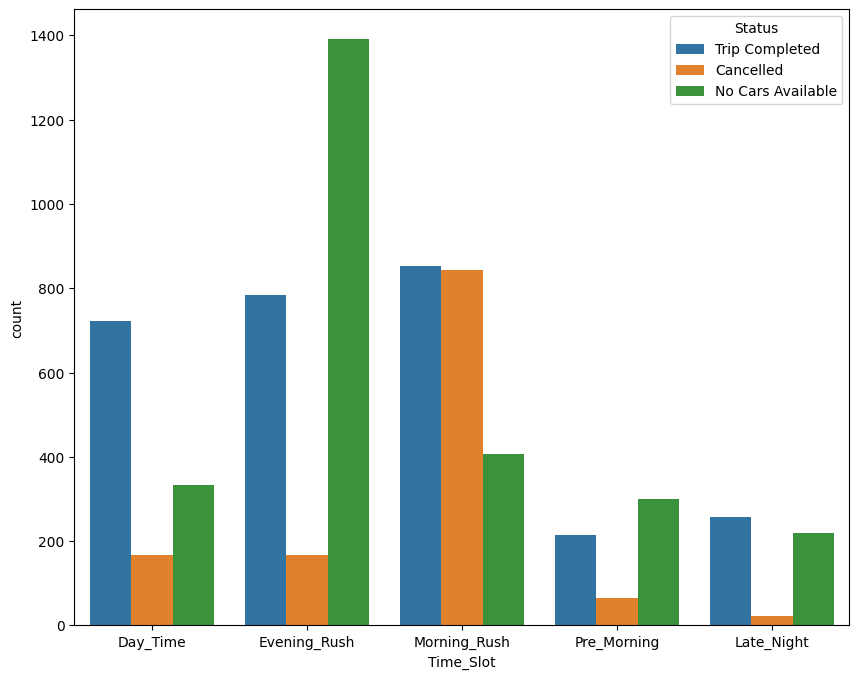

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(x="Time_Slot", hue="Status", data=df)
plt.show()

In [30]:
df_morning_rush = df[df['Time_Slot']=='Morning_Rush']

<Axes: xlabel='Pickup point', ylabel='count'>

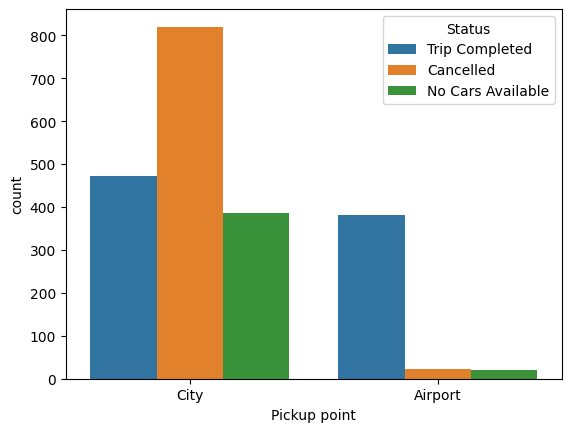

In [31]:
sns.countplot(x="Pickup point", hue="Status", data=df_morning_rush)

#### Cancellation of cab as per the pickup location at morning rush hours

In [32]:
# Pickup point = Airport

df_airport_cancelled = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")
                                           & (df_morning_rush["Status"]=="Cancelled")]
len(df_airport_cancelled)

23

In [33]:
# Pickup point = City

df_city_cancelled = df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]
len(df_city_cancelled)

820

#### Morning Rush - City

In [34]:
df_morning_rush[(df_morning_rush["Pickup point"]=="City")].shape[0]

1677

In [35]:
df_morning_rush[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

820

In [36]:
df_morning_rush[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

472

In [37]:
df_morning_rush[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

385

#### Morning Rush - Airport

In [38]:
df_morning_rush[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [39]:
df_morning_rush[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

23

In [40]:
df_morning_rush[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

In [41]:
df_morning_rush[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

21

### Evening Rush

In [42]:
df_evening_rush = df[df['Time_Slot']=='Evening_Rush']
df_evening_rush.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Evening_Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Evening_Rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,13,Evening_Rush


In [43]:
df_city_cancelled = df_evening_rush[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]
df_city_cancelled.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,17,14,Evening_Rush
2864,3549,City,9.0,Cancelled,2016-07-13 18:03:30,NaT,18,13,Evening_Rush
2871,3499,City,13.0,Cancelled,2016-07-13 17:46:24,NaT,17,13,Evening_Rush
2881,3810,City,16.0,Cancelled,2016-07-13 21:06:22,NaT,21,13,Evening_Rush
2892,4968,City,19.0,Cancelled,2016-07-14 18:40:44,NaT,18,14,Evening_Rush


In [44]:
df_airport_cancelled = df_evening_rush[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")]
df_airport_cancelled.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,20,14,Evening_Rush
2835,2347,Airport,2.0,Cancelled,2016-07-12 19:14:00,NaT,19,12,Evening_Rush
2836,3806,Airport,2.0,Cancelled,2016-07-13 20:57:49,NaT,20,13,Evening_Rush
2838,5023,Airport,2.0,Cancelled,2016-07-14 19:04:08,NaT,19,14,Evening_Rush
2844,1254,Airport,4.0,Cancelled,2016-07-11 21:53:00,NaT,21,11,Evening_Rush


<Axes: xlabel='Pickup point', ylabel='count'>

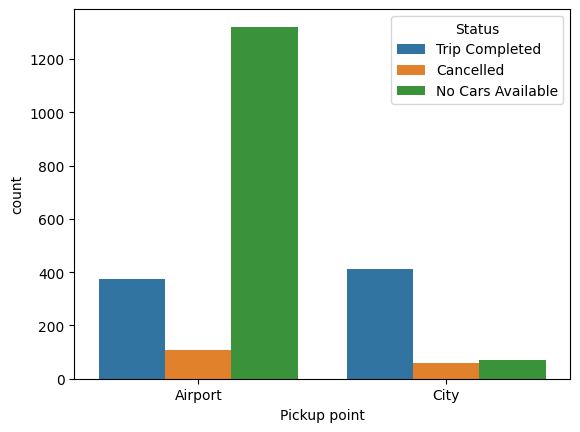

In [45]:
sns.countplot(x="Pickup point", hue="Status", data=df_evening_rush)

In [46]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

#### Evening Rush - City

In [47]:
df_evening_rush[(df_evening_rush["Pickup point"]=="City")].shape[0]

542

In [48]:
df_evening_rush[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

In [49]:
df_evening_rush[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

411

In [50]:
df_evening_rush[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

71

#### Evening Rush - Airport

In [51]:
df_evening_rush[(df_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

In [52]:
df_evening_rush[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [53]:
df_evening_rush[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

In [54]:
df_evening_rush[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

1321

#### Pie Chart Analysis

In [55]:
df_morning_city = df[(df["Pickup point"]=="City")&(df["Time_Slot"]=="Morning_Rush")]

In [56]:
df_morning_city_count = pd.DataFrame(df_morning_city["Status"].value_counts())

In [57]:
df_morning_city_count

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


In [58]:
df_morning_city_count["Status"].values

array([820, 472, 385])

In [59]:
df_morning_city_count["Status"].index

Index(['Cancelled', 'Trip Completed', 'No Cars Available'], dtype='object')

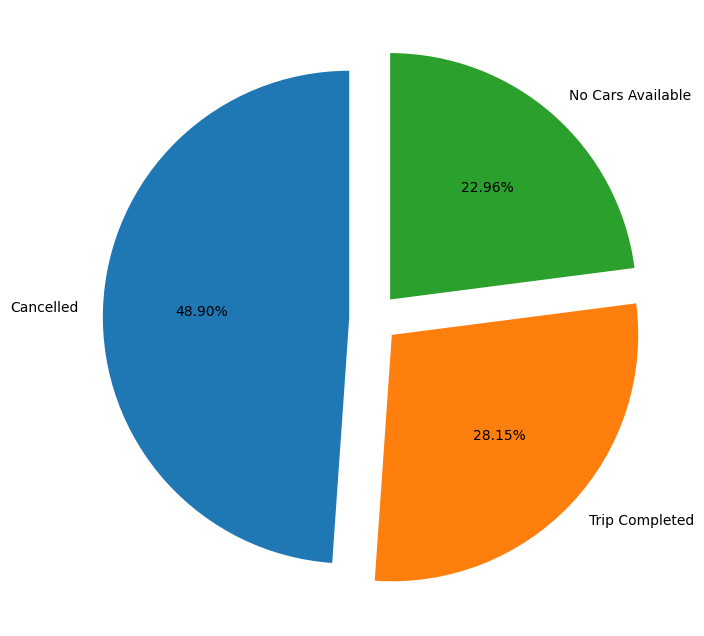

In [60]:
plt.figure(figsize=(10,8))
plt.pie(df_morning_city_count["Status"].values, labels=df_morning_city_count["Status"].index, explode=[0.1,0.1,0.1],
        autopct="%.2f%%", startangle=90)
plt.show()

In [61]:
df_evening_airport = df[(df["Pickup point"]=="Airport")&(df["Time_Slot"]=="Evening_Rush")]
df_evening_airport_count = pd.DataFrame(df_evening_airport["Status"].value_counts())
df_evening_airport_count

,Status
No Cars Available,1321
Trip Completed,373
Cancelled,106


In [62]:
df_evening_airport_count["Status"].values

array([1321,  373,  106])

In [63]:
df_evening_airport_count["Status"].index

Index(['No Cars Available', 'Trip Completed', 'Cancelled'], dtype='object')

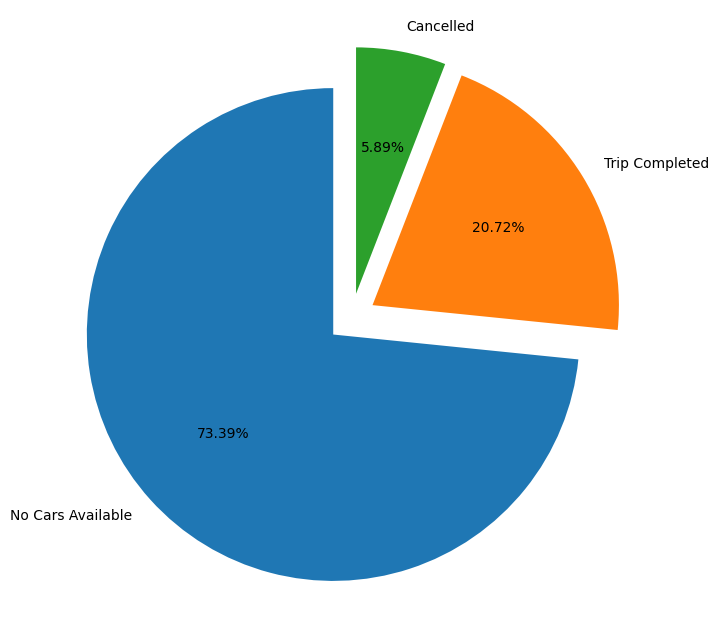

In [64]:
plt.figure(figsize=(10,8))
plt.pie(df_evening_airport_count["Status"].values, labels=df_evening_airport_count["Status"].index, explode=[0.1,0.1,0.1],
      autopct="%.2f%%", startangle=90)
plt.show()

### Key Take Aways

#### 1) We explored the dataset with the number of user requests and the number of columns(6745,6) along with other facts such as number/percentage of NaNs in each columns and format of dataTime in the request and drop timestamp columns.
#### 2) We standardised format of DateTime in the request and drop timestamp columns.
#### 3) Figured a logical reason as to why the NaNs in Driver_id and drop timestamp columns should be ignored.
#### 4) Extracted the day number and hour from the request timestamp column to perform a deeper analysis.
#### 5) Between hours 5AM-9AM, the load on cabs are high with almost equal amount of trips getting completed and cancelled.
#### 6) Between hours 5PM-9PM, the load on cabs are significantly high. Hence, there is mismatch between cab demand and availabilty. Hence, we see more of "No cars Available Status".
#### 7) Between hours 5AM-9AM, the users from city is significantly high.
#### 8) Between hours 5PM-9PM, the users from Airport is significantly high.
#### 9) The "Morning_Rush" and "Evening_Rush" are the hours with maximum load(i.e more number of users requesting cab services).
#### 10) We also saw the load during "Morning_rush" and "Evening_Rush" from both pick-up points "City" and "Airport".
#### 11) During the evening rush hour, we saw a significant number of No CARS AVAILABLE status  for the trip bookings from "Airport".